<font size="+3"><strong>5.2. Imbalanced Data</strong></font>

In [1]:
import gzip
import json
import pickle
import re


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier


from scipy.io.arff import loadarff


# Prepare Data

**Task 5.2.1:** Complete the `wrangle` function below using the code you developed in the last lesson. Then use it to import `poland-bankruptcy-data-2009.json.gz` into the DataFrame `df`.

In [2]:
def wrangle(filename):
    # Load ARFF file
    data, meta = loadarff(filename)
    
    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Rename columns
    df.columns = [re.sub(pattern='Attr',repl='feat_',string=col) for col in df.columns]
    df.rename(columns={'class':'bankrupt'},inplace=True)
    
    # Change dtype of the Labels columns
    df['bankrupt'] = df['bankrupt'].astype(np.int64)

    return df

In [3]:
df = wrangle("../data/raw/1year.arff")
print(df.shape)
df.head()

(7027, 65)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feat_1    7024 non-null   float64
 1   feat_2    7024 non-null   float64
 2   feat_3    7024 non-null   float64
 3   feat_4    6997 non-null   float64
 4   feat_5    7019 non-null   float64
 5   feat_6    7024 non-null   float64
 6   feat_7    7024 non-null   float64
 7   feat_8    7002 non-null   float64
 8   feat_9    7026 non-null   float64
 9   feat_10   7024 non-null   float64
 10  feat_11   6988 non-null   float64
 11  feat_12   6997 non-null   float64
 12  feat_13   7027 non-null   float64
 13  feat_14   7024 non-null   float64
 14  feat_15   7025 non-null   float64
 15  feat_16   7002 non-null   float64
 16  feat_17   7002 non-null   float64
 17  feat_18   7024 non-null   float64
 18  feat_19   7027 non-null   float64
 19  feat_20   7027 non-null   float64
 20  feat_21   5405 non-null   floa

**Task 5.2.3:** Create a bar chart of the value counts for the `"bankrupt"` column. You want to calculate the relative frequencies of the classes, not the raw count, so be sure to set the `normalize` argument to `True`.


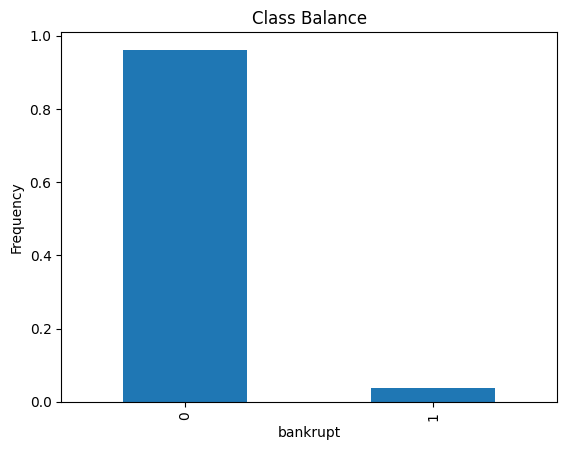

In [5]:
# Plot class balance
df["bankrupt"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel = "bankrupt",
    ylabel = "Frequency",
    title = "Class Balance"
);

**Task 5.2.4:** Use seaborn to create a boxplot that shows the distributions of the `"feat_27"` column for both groups in the `"bankrupt"` column. Remember to label your axes. 


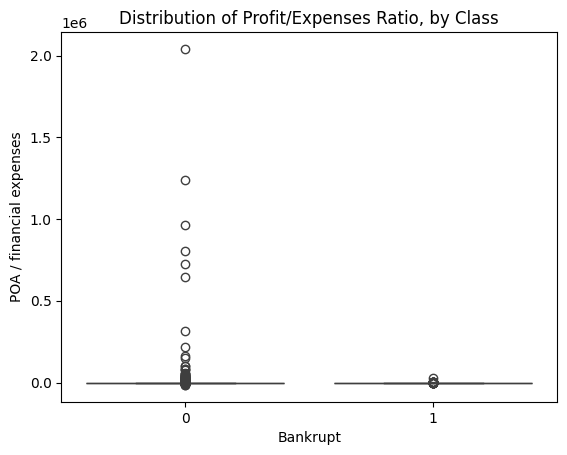

In [6]:
# Create boxplot
sns.boxplot(x="bankrupt", y="feat_27", data=df)
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

**Task 5.2.5:** Use the `describe` method on the column for `"feat_27"`. What can you tell about the distribution of the data based on the mean and median?

In [7]:
# Summary statistics for `feat_27`
df["feat_27"].describe().apply("{0:,.0f}".format)

count        6,716
mean         1,322
std         35,504
min        -14,790
25%              0
50%              1
75%              6
max      2,040,800
Name: feat_27, dtype: object

**Task 5.2.6:** Create a histogram of `"feat_27"`. Make sure to label x-axis `"POA / financial expenses"`, the y-axis `"Count"`, and use the title `"Distribution of Profit/Expenses Ratio"`.


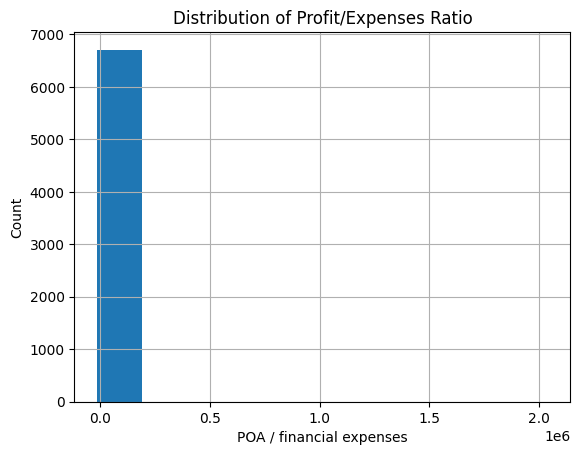

In [8]:
# Plot histogram of `feat_27`
df["feat_27"].hist()

plt.xlabel("POA / financial expenses")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

**Task 5.2.7:** Recreate the boxplot that you made above, this time only using the values for `"feat_27"` that fall between the `0.1` and `0.9` quantiles for the column.


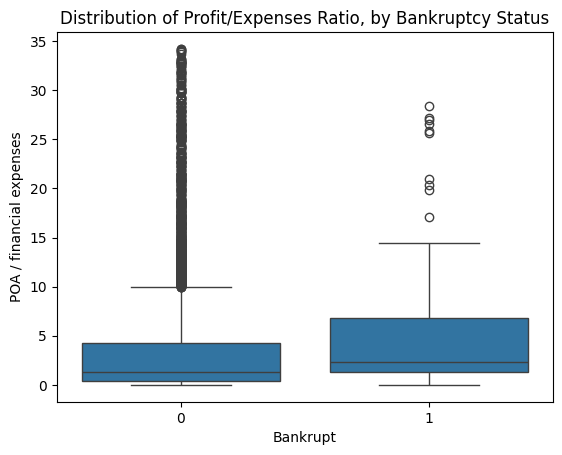

In [9]:
# Create clipped boxplot
q1, q9 = df["feat_27"].quantile([0.1, 0.9])
mask = df["feat_27"].between(q1, q9)
sns.boxplot(x="bankrupt", y="feat_27", data = df[mask])


plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Bankruptcy Status");

**Task 5.2.8:** Repeat the exploration you just did for `"feat_27"` on two other features in the dataset. Do they show the same skewed distribution? Are there large differences between bankrupt and solvent companies?

**Task 5.2.9:** Plot a correlation heatmap of features in `df`. Since `"bankrupt"` will be your target, you don't need to include it in your heatmap.


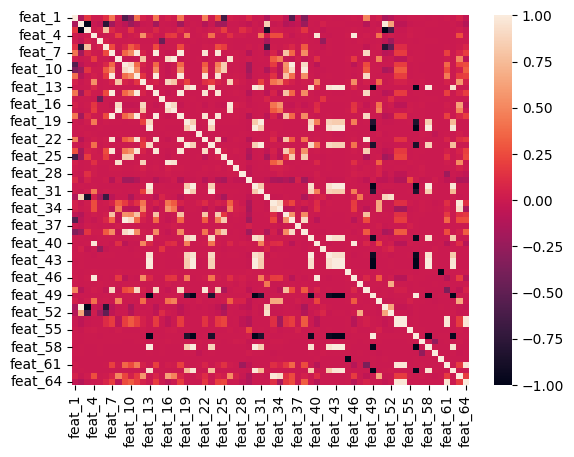

In [10]:
corr = df.drop(columns="bankrupt").corr()
sns.heatmap(corr);

**Task 5.2.10:** Create your feature matrix `X` and target vector `y`. Your target is `"bankrupt"`. 


In [11]:
target = "bankrupt"
X = df.drop(columns="bankrupt")  # Features

y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (7027, 64)
y shape: (7027,)


**Task 5.2.11:** Divide your data (`X` and `y`) into training and test sets using a randomized train-test split. Your validation set should be 20% of your total data. And don't forget to set a `random_state` for reproducibility. 


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5621, 64)
y_train shape: (5621,)
X_test shape: (1406, 64)
y_test shape: (1406,)


**Task 5.2.12:** Create a new feature matrix `X_train_under` and target vector `y_train_under` by performing random under-sampling on your training data.


In [13]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

(440, 64)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
4518,0.083801,0.69137,-0.12093,0.71466,-37.7370,0.000000,0.15832,0.44641,3.8944,0.30863,...,-219.26,0.061055,0.27152,0.96160,0.851650,20.8730,179.7600,39.720,9.1893,5.5864
1252,0.475390,0.40938,0.54733,2.37410,302.8700,-0.012545,0.58823,1.44270,1.1372,0.59062,...,6707.90,0.460370,0.80491,0.51249,0.000000,29.9560,9.9641,127.850,2.8549,20.9260
6251,0.173240,0.29784,0.30042,2.35970,30.7480,0.292910,0.21601,2.35750,1.1938,0.70216,...,5752.10,0.162350,0.24673,0.83765,0.109510,6.4705,4.6051,62.415,5.8480,2.6996
6339,0.112740,0.52959,0.17520,2.10640,67.9310,0.000000,0.11274,0.88824,1.0380,0.47041,...,1673.90,0.247870,0.23966,0.76232,0.757990,43.6840,5.5789,55.683,6.5550,1.5576
1838,0.346030,0.39724,0.37842,1.96130,6.3365,0.000000,0.43177,1.51740,3.7657,0.60276,...,1589.00,0.125540,0.57408,0.88544,0.005927,12.8870,9.8517,38.157,9.5656,16.5050


In [14]:
y_train_under.value_counts(normalize=True)

bankrupt
0    0.5
1    0.5
Name: proportion, dtype: float64

**Task 5.2.13:** Create a new feature matrix `X_train_over` and target vector `y_train_over` by performing random over-sampling on your training data.


In [15]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(10802, 64)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
0,0.535540,0.052232,0.441390,10.49400,165.210000,0.000000,0.535540,18.14500,1.81560,0.94777,...,27537.0,0.536310,0.565050,0.48781,0.000000,25.4630,4.6517,9.3465,39.0520,3.5452
1,0.000681,0.486750,-0.017475,0.94759,-5.587200,0.032626,0.000681,0.45175,0.99660,0.21989,...,-262.9,-0.003411,0.003096,1.00340,0.697370,106.4600,13.3880,35.6920,10.2260,4.9842
2,0.081678,0.422160,0.456520,2.70710,-0.063859,0.000000,0.101790,1.36880,1.97560,0.57784,...,2266.8,0.044539,0.141350,0.94900,0.000000,4.3322,9.3488,49.4080,7.3874,7.1565
3,0.172720,0.159200,0.627720,5.13760,16.825000,0.000000,0.172720,5.28150,1.93310,0.84080,...,1421.6,0.097010,0.205430,0.91067,0.008902,3.5406,9.2799,28.6460,12.7420,8.7645
4,0.070920,0.826400,-0.091116,0.71330,-85.703000,0.000000,0.070920,0.21007,0.79853,0.17360,...,-3796.8,0.102350,0.408520,0.91186,1.896600,11.1470,6.0414,145.2700,2.5126,1.0326


**Task 5.2.14:** Calculate the baseline accuracy score for your model.


In [16]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9609


**Task 5.2.15:** Create three identical models: `model_reg`, `model_under` and `model_over`. All of them should use a `SimpleImputer` followed by a `DecisionTreeClassifier`. Train `model_reg` using the unaltered training data. For `model_under`, use the undersampled data. For `model_over`, use the oversampled data.


In [17]:
# Fit on `X_train`, `y_train`
model_reg = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
model_reg.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

**Task 5.2.16:** Calculate training and test accuracy for your three models. 


In [18]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9573
Training Accuracy: 0.8098
Test Accuracy: 0.7845
Training Accuracy: 1.0
Test Accuracy: 0.9701


**Task 5.2.17:** Plot a confusion matrix that shows how your best model performs on your validation set. 


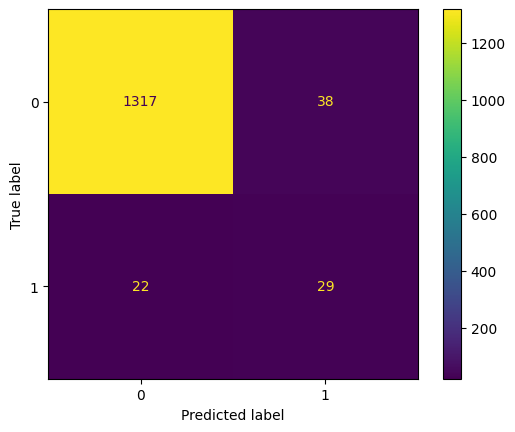

In [19]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_reg, X_test, y_test);

**Task 5.2.18:** Determine the depth of the decision tree in `model_over`.


In [20]:
depth = model_over.named_steps["decisiontreeclassifier"].get_depth()
print(depth)

28


**Task 5.2.19:** Create a horizontal bar chart with the 15 most important features for `model_over`. Be sure to label your x-axis `"Gini Importance"`.


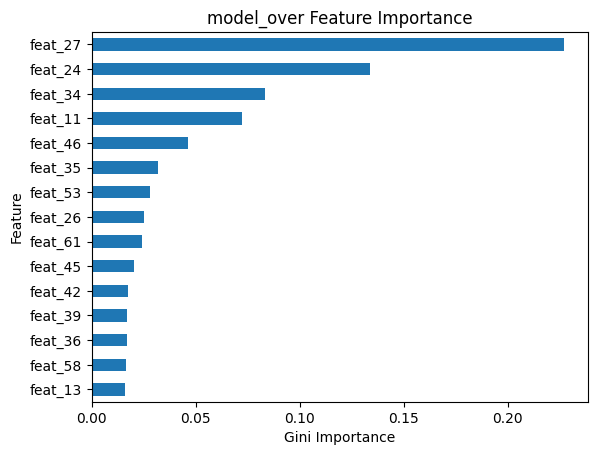

In [21]:
# Get importances
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")

plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

**Task 5.2.20:** Using a context manager, save your best-performing model to a a file named `"model-5-2.pkl"`. 

In [22]:
# Save your model as `"model-5-2.pkl"`
with open("model-5-2.pkl", "wb") as f:
    pickle.dump(model_over, f)

**Task 5.2.21:** Make sure you've saved your model correctly by loading `"model-5-2.pkl"` and assigning to the variable `loaded_model`. Once you're satisfied with the result, run the last cell to submit your model to the grader. 


In [24]:
# Load `"model-5-2.pkl"`
with open("model-5-2.pkl", "rb") as f:
    loaded_model = pickle.load(f)
print(loaded_model)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])
